In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import scatter_matrix as scatter_matrix

from pprint import pprint as pp


%matplotlib inline

### dataset
**Job outcomes of students who graduated from US college between 2010 and 2012.**

### data dictionary:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.


In [40]:
fn='recent-grads.csv'
grad=pd.read_csv(fn)
pp(grad.shape)
grad.head()

(173, 21)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [41]:
#checking for nans
grad.isnull().sum() 

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [42]:
#find rows with nans
grad.loc[grad.isnull().any(axis=1),:]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [45]:
recent_grads = grad.dropna()
recent_grads.shape
cleaned_data_count = recent_grads.shape[0]

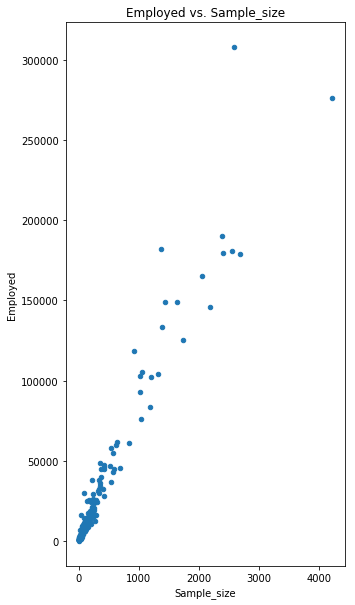

In [46]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter',
                  title='Employed vs. Sample_size', figsize=(5,10))

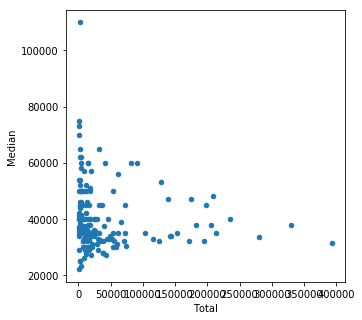

In [49]:
x='Total'
y='Median'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))

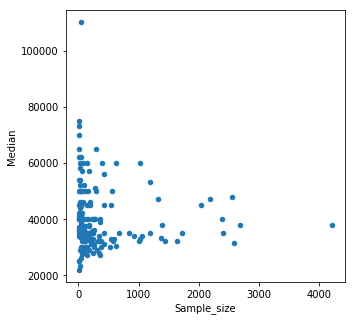

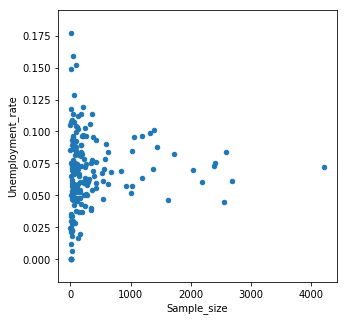

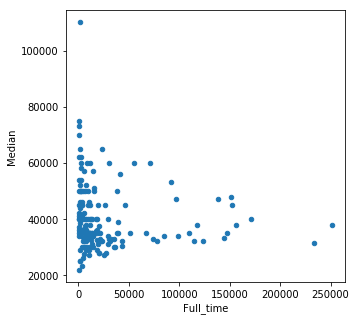

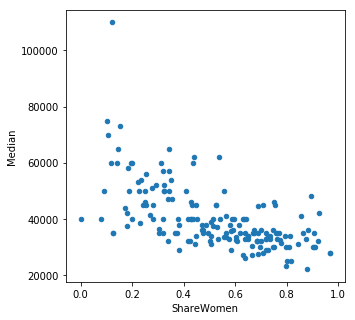

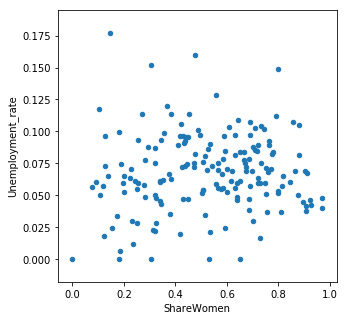

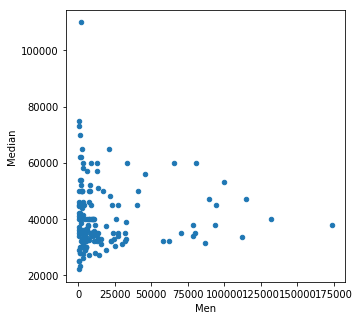

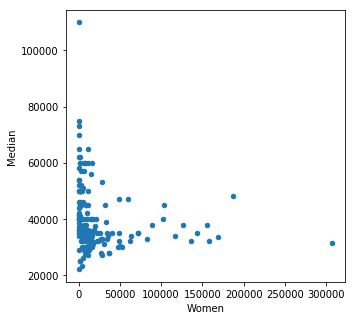

In [50]:
x='Sample_size'
y='Median'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))

x='Sample_size'
y='Unemployment_rate'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))

x='Full_time'
y='Median'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))

x='ShareWomen'
y='Median'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))


x='ShareWomen'
y='Unemployment_rate'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))

x='Men'
y='Median'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))

x='Women'
y='Median'
recent_grads.plot(x=x, y=y, kind='scatter',figsize=(5,5))



##### based on visualization
 * students in more popular majors do not make more money 
 * students  in majors that were majority femaile do not make more money
 * for a smaller full_time values we have a larger dispersion of median salaries.This means that top earners are a niche in a total job market
 

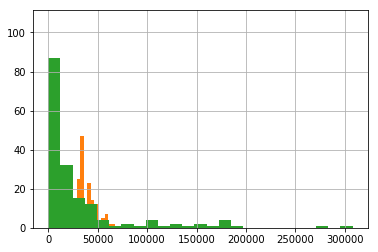

In [66]:
x ='Sample_size'
recent_grads[x].hist(bins=25, range=(0,5000))                

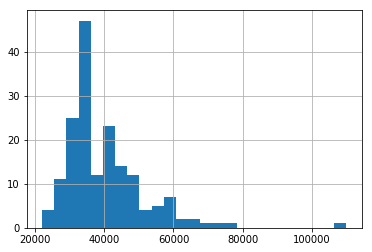

In [67]:
x ='Median'
recent_grads[x].hist(bins=25)  

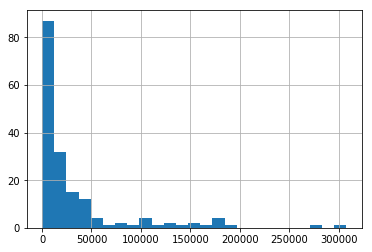

In [68]:
x ='Employed'
recent_grads[x].hist(bins=25)  

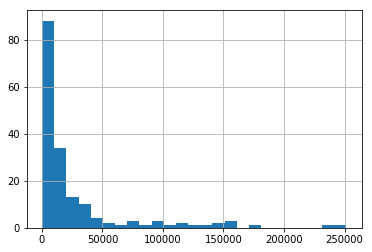

In [69]:
x ='Full_time'
recent_grads[x].hist(bins=25) 

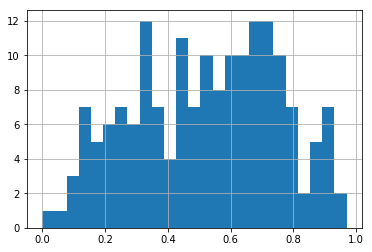

In [70]:
x ='ShareWomen'
recent_grads[x].hist(bins=25) 

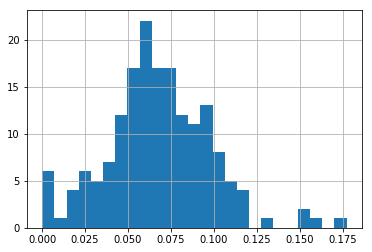

In [71]:
x ='Unemployment_rate'
recent_grads[x].hist(bins=25)

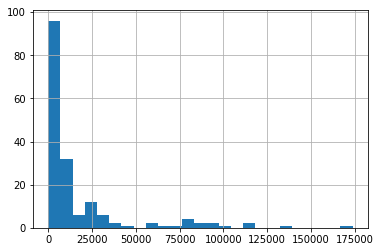

In [72]:
x ='Men'
recent_grads[x].hist(bins=25)

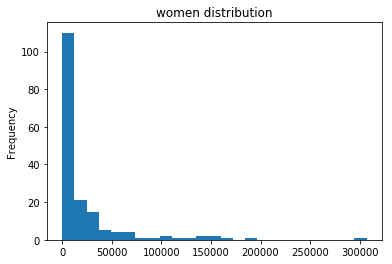

In [125]:
x ='Women'
recent_grads[x].plot(kind='hist', bins=25, title='women distribution')

#### based o histograms visualizations
* percentage of majors predominantly femaile is higher than a percentage of margins predominantly male
* the most common median salary range is 30-35 K 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12181f400>,
      dtype=object)

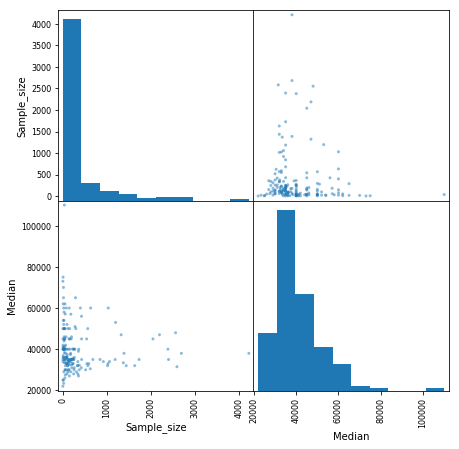

In [79]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1219aab38>,
      dtype=object)

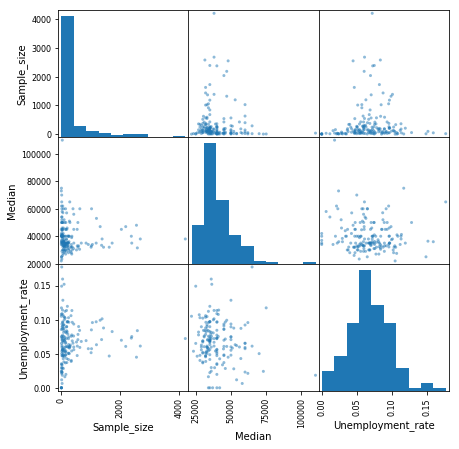

In [80]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(7,7))

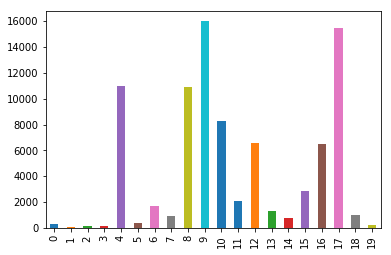

In [85]:
recent_grads[:20]['Women'].plot(kind='bar')

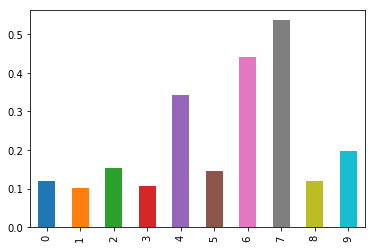

In [86]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

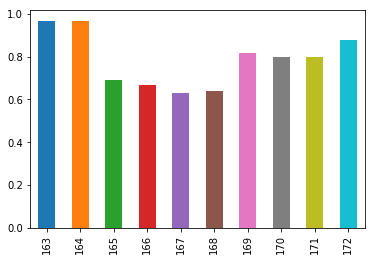

In [90]:
recent_grads[cleaned_data_count-10:cleaned_data_count]['ShareWomen'].plot(kind='bar')

#### we observe that the most lucractive majors are occupied by men

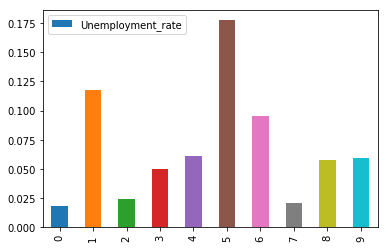

In [130]:
recent_grads[:10].plot(kind='bar',y='Unemployment_rate')

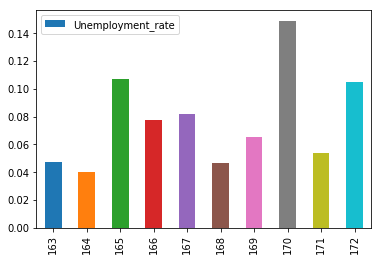

In [129]:
recent_grads[cleaned_data_count-10:cleaned_data_count].plot(kind='bar', y='Unemployment_rate')

#### we observe that on aveage there is more unemployment in last ranking majors

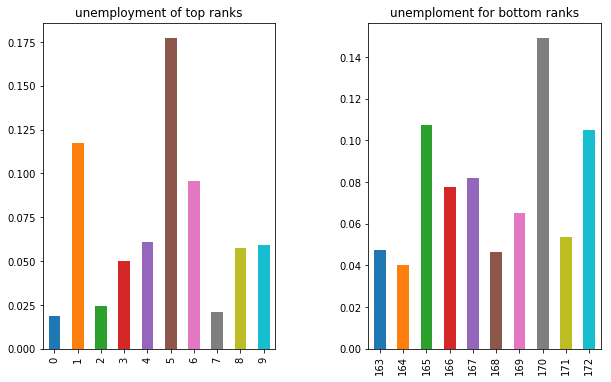

In [134]:
x='Unemployment_rate'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
recent_grads[:10][x].plot(kind='bar', title='unemployment of top ranks')
plt.subplot(1,2,2)
recent_grads[cleaned_data_count-10:cleaned_data_count][x].plot(kind='bar',
                                                               title='unemploment for bottom ranks')
plt.subplots_adjust(wspace=0.4)


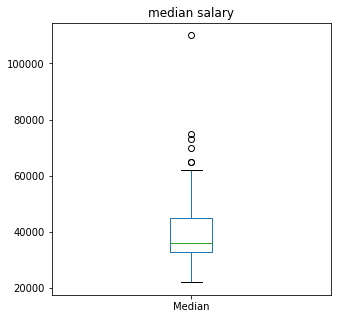

In [139]:
recent_grads.plot(y='Median', kind='box',
                  title='median salary', figsize=(5,5))
